In [1]:
import pandas as pd
from pathlib import Path

In [2]:
file_name = None  # fill in file name with results here

### Read the data

In [3]:
results = (
    pd.read_parquet(f"../results/{file_name}")
    .reset_index()
    .assign(
        horizon=lambda df: df["date"].subtract(df["forecast_date"]).dt.days,
        ae=lambda df: df["y_pred"].subtract(df["y_test"]).abs()
    )
)

### Check that we number of forecasts matches for both methods

In [4]:
print(results.groupby(["model", "horizon"]).size())

model           horizon
multi-horizon   1          11098360
                7          10915420
                14         10701990
single-horizon  1          11098360
                7          10915420
                14         10701990
dtype: int64


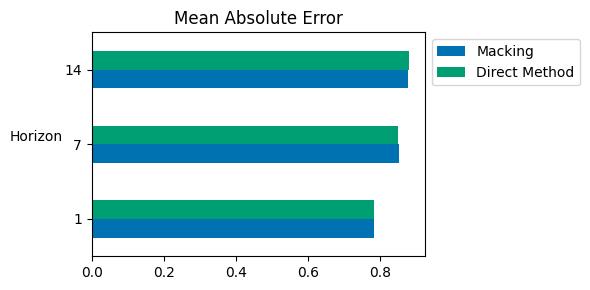

In [5]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-colorblind")

(
    results
    .groupby(["model", "horizon"])
    ["ae"]
    .mean()
    .unstack(level=0)
    .rename(columns={"multi-horizon": "Macking", "single-horizon": "Direct Method"})
    .plot
    .barh(figsize=(6, 3))
)

plt.title("Mean Absolute Error")
plt.ylabel("Horizon", rotation=0, labelpad=20)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()